In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
pd.set_option('display.max_columns',80)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('C:\\Users\\Sambhu\\Desktop\\Imarticus\\Class Material\\kaggle\\Hotel Reservations.csv')

In [3]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
df.drop_duplicates(subset=['Booking_ID'], inplace= True)

In [6]:
del df['Booking_ID']

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.booking_status.value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

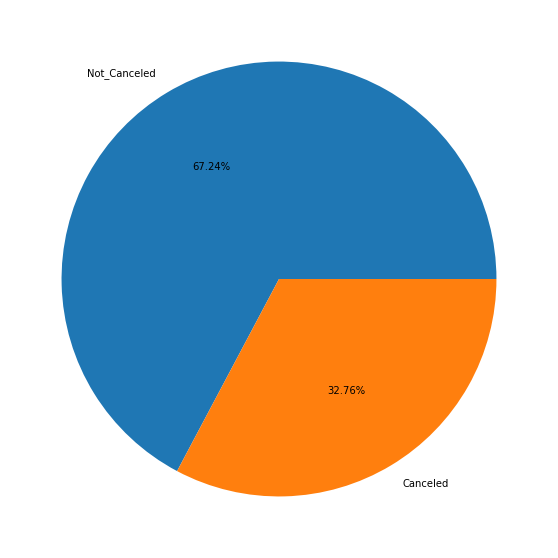

In [9]:
plt.figure(figsize=(30,10))
plt.pie(df.booking_status.value_counts().values, labels=df.booking_status.value_counts().index, autopct='%1.2f%%')
plt.show()

In [10]:
df.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

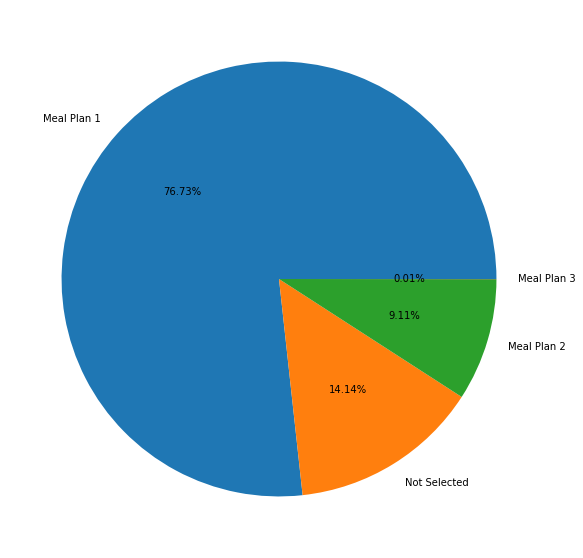

In [11]:
plt.figure(figsize=(30,10))
plt.pie(df.type_of_meal_plan.value_counts().values, labels=df.type_of_meal_plan.value_counts().index, autopct='%1.2f%%')
plt.show()

In [12]:
df.required_car_parking_space.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

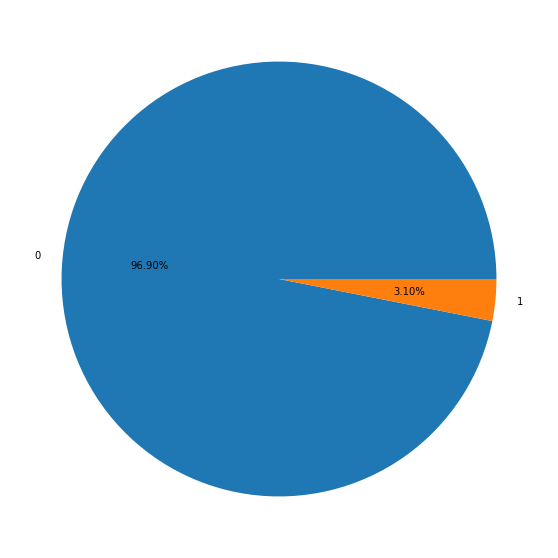

In [13]:
plt.figure(figsize=(30,10))
plt.pie(df.required_car_parking_space.value_counts().values, labels=df.required_car_parking_space.value_counts().index, autopct='%1.2f%%')
plt.show()

In [14]:
df.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

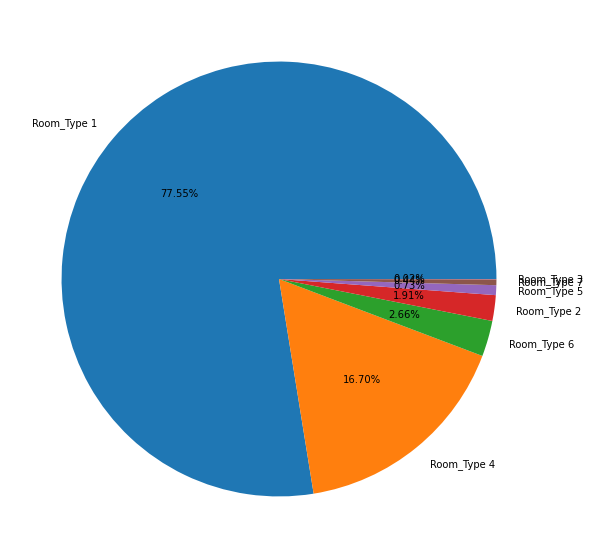

In [15]:
plt.figure(figsize=(30,10))
plt.pie(df.room_type_reserved.value_counts().values, labels=df.room_type_reserved.value_counts().index, autopct='%1.2f%%')
plt.show()

In [16]:
df.arrival_year.value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

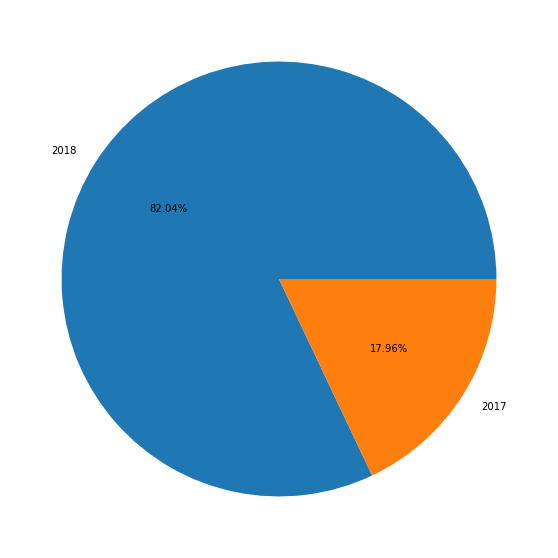

In [17]:
plt.figure(figsize=(30,10))
plt.pie(df.arrival_year.value_counts().values, labels=df.arrival_year.value_counts().index, autopct='%1.2f%%')
plt.show()

In [18]:
df.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

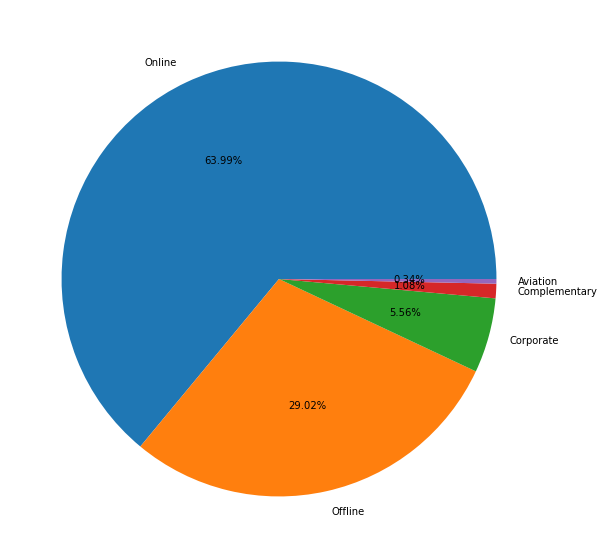

In [19]:
plt.figure(figsize=(30,10))
plt.pie(df.market_segment_type.value_counts().values, labels=df.market_segment_type.value_counts().index, autopct='%1.2f%%')
plt.show()

In [20]:
df.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

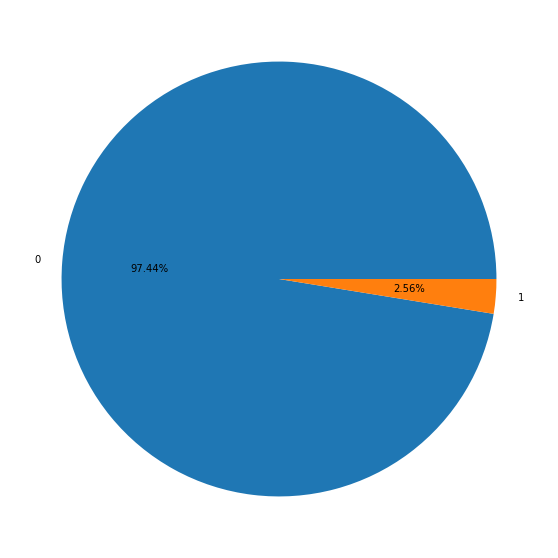

In [21]:
plt.figure(figsize=(30,10))
plt.pie(df.repeated_guest.value_counts().values, labels=df.repeated_guest.value_counts().index, autopct='%1.2f%%')
plt.show()

In [22]:
# From the above pie charts below are inferences

# Around 30% of the cancel after booking
# Majorly 76% select booking with meal plan 14% do not select any meal plan. May be the hotel can look to remove other meal plans.
# 96% of people do not require parking.
# Room_type 1 booking is around 77%, Room_type booking is around 16%
# 82% booking happened 2018, 
# 64% booking happens online, 30% booking happens offline
# Only 2.5% are repeated guest

# From the above pie-chart we have found out the major contributors which affects Cancelling and Not Cancelling

In [23]:
df_dummies = pd.get_dummies(df[['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'market_segment_type', 'repeated_guest', 'booking_status']])

In [24]:
df_dummies.head()

,required_car_parking_space,arrival_year,repeated_guest,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 1,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Canceled,booking_status_Not_Canceled
0,0,2017,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,2018,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,2018,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,2018,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,2018,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0


<AxesSubplot:>

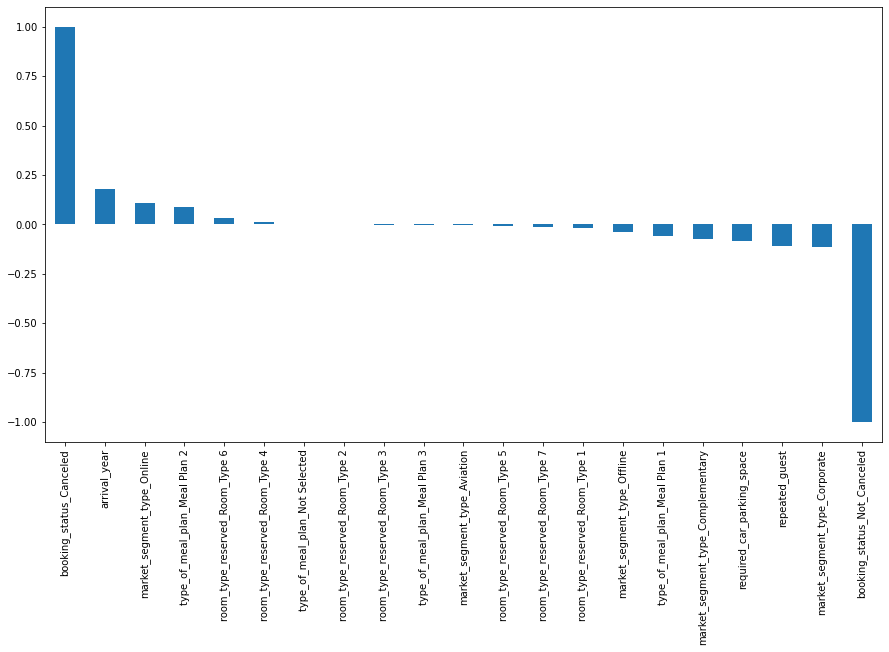

In [25]:
plt.figure(figsize=(15,8))
df_dummies.corr()['booking_status_Canceled'].sort_values(ascending=False).plot(kind='bar')

In [26]:
# Few good things observed from the above plot, Corporate bookings, repeated guests, Meal Plan 1, Room Type 1 -ve related to cancellation.
# Room Type 1 with Meal Plan 1 are majority of the guest
# Hotel needs to focus to increase corporate guests and repeated guests

In [27]:
# sns.pairplot(data=df, hue='booking_status')

In [28]:
# From the above plots we try to draw a plane for seperating categories, so logistic regression can be applied.

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

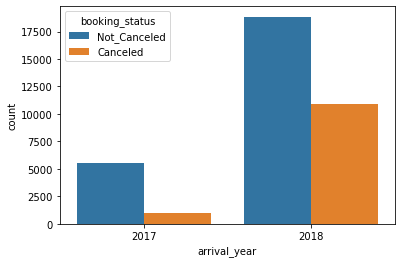

In [29]:
sns.countplot(x=df.arrival_year, hue=df.booking_status)

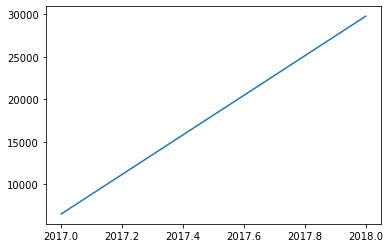

In [30]:
plt.plot(df.booking_status.groupby(df.arrival_year).count())

In [31]:
# Looks like data is missing for certain part of the year in 2017

In [32]:
# df_year_month = df[['arrival_year', 'arrival_month']]

In [33]:
df.arrival_month[df.arrival_year == 2017].value_counts()

10    1913
9     1649
8     1014
12     928
11     647
7      363
Name: arrival_month, dtype: int64

In [34]:
# Looks like the data is available from the month of july in 2017.

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

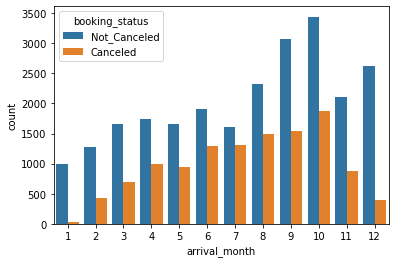

In [35]:
sns.countplot(x=df.arrival_month, hue=df.booking_status)

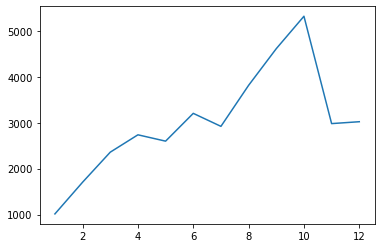

In [36]:
plt.plot(df.booking_status.groupby(df.arrival_month).count())

In [37]:
# On Overall picture we see that there is gradual increase in bookings, but there is sudden dip in bookings in November and December
# Same pattern is follwed in cancellation percentage, but percentage is very high in june and july, keeps decreasing August to December

<AxesSubplot:xlabel='arrival_date', ylabel='count'>

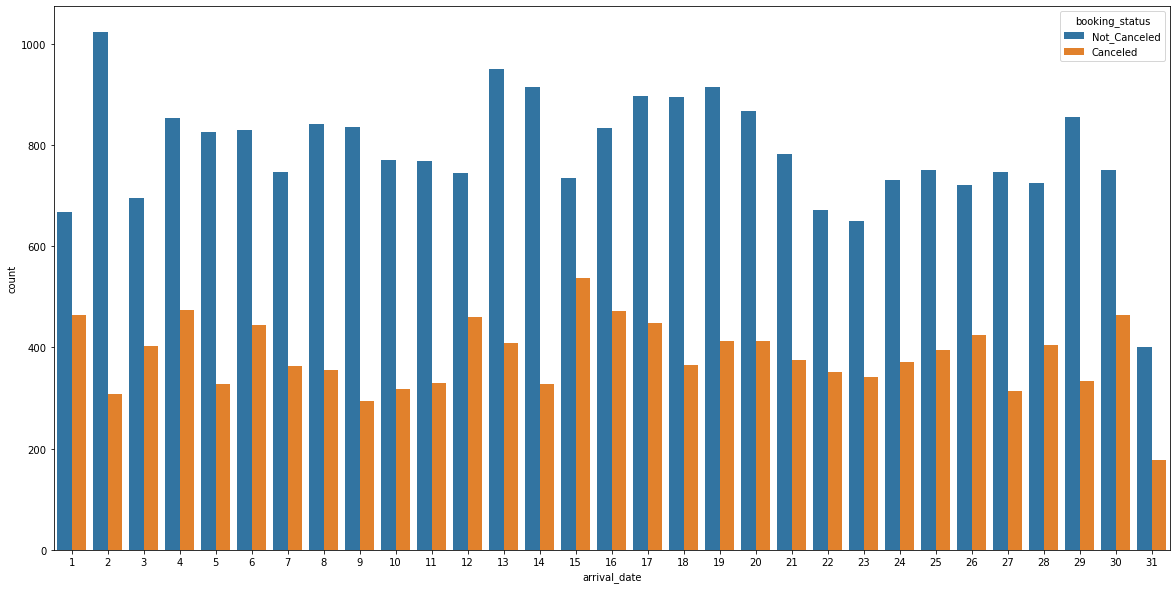

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(x=df.arrival_date, hue=df.booking_status)

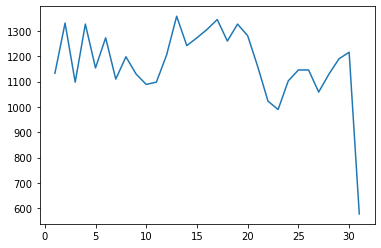

In [39]:
plt.plot(df.booking_status.groupby(df.arrival_date).count())

In [40]:
# Cancellation percentage is almost same across all days, but we see a sudden dip in booking in the month end

## We will analyse data seperately for 2018

In [41]:
df_2018 = df[df.arrival_year == 2018]

In [42]:
df_2018.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled


In [43]:
df_2018.arrival_month[df_2018.arrival_year == 2018].value_counts()

10    3404
6     3203
9     2962
8     2799
4     2736
5     2598
7     2557
3     2358
11    2333
12    2093
2     1704
1     1014
Name: arrival_month, dtype: int64

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

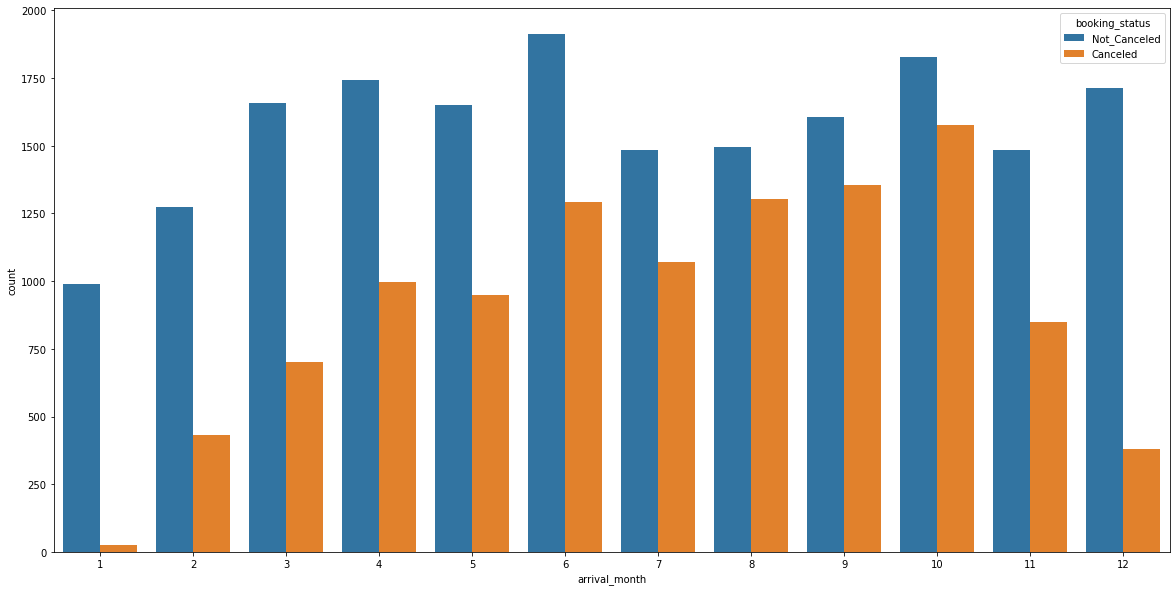

In [44]:
plt.figure(figsize=(20,10))
sns.countplot(x=df_2018.arrival_month, hue=df_2018.booking_status)

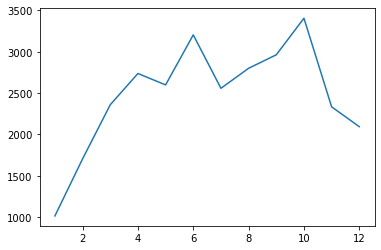

In [45]:
plt.plot(df_2018.booking_status.groupby(df_2018.arrival_month).count())

<AxesSubplot:xlabel='arrival_date', ylabel='count'>

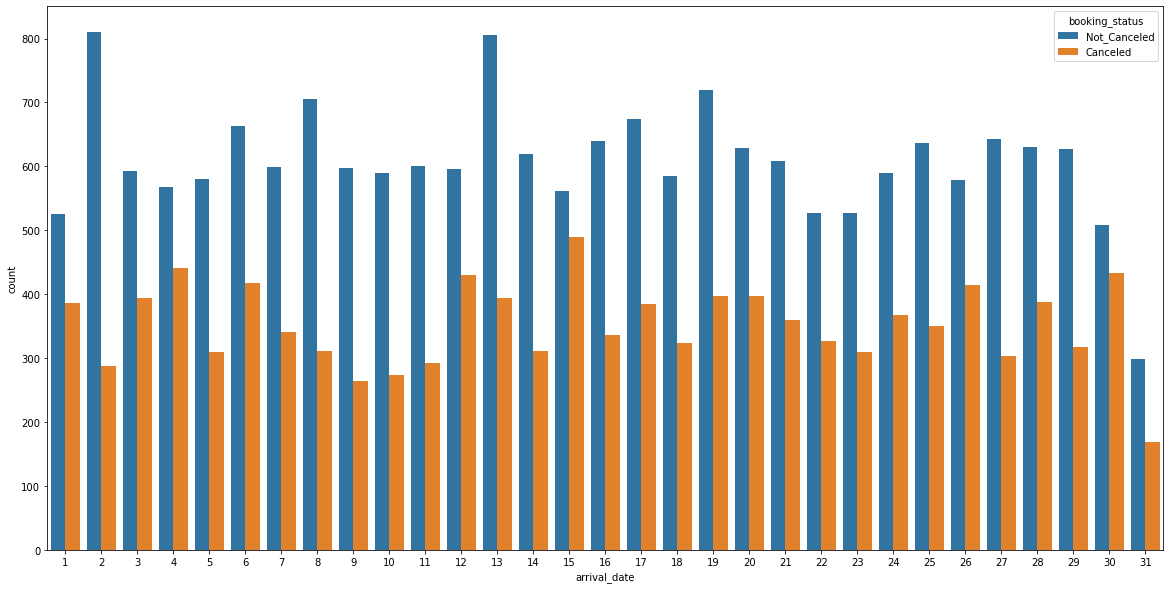

In [46]:
plt.figure(figsize=(20,10))
sns.countplot(x=df_2018.arrival_date, hue=df_2018.booking_status)

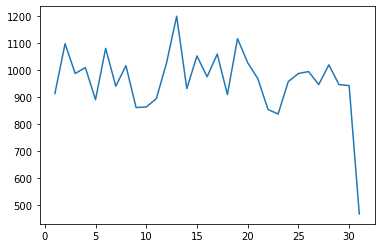

In [47]:
plt.plot(df_2018.booking_status.groupby(df_2018.arrival_date).count())

In [48]:
# We see that similar pattern is followed for data in 2018 as for overall data

In [49]:
continuous = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','arrival_month','arrival_date','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']

no_of_adults:
                  count      mean       std  min  25%  50%  75%  max
booking_status                                                      
Canceled        11885.0  1.909550  0.486243  0.0  2.0  2.0  2.0  4.0
Not_Canceled    24390.0  1.813489  0.530993  0.0  2.0  2.0  2.0  4.0


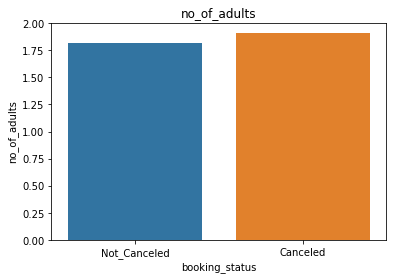

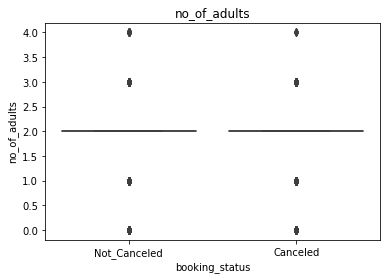

no_of_adults  p-value  8.848338257094206e-62  Good Predictor. Avg of this feature is not same for both the groups
-----------------------------------------------------------------------------------------------------
no_of_children:
                  count      mean       std  min  25%  50%  75%   max
booking_status                                                       
Canceled        11885.0  0.124358  0.440903  0.0  0.0  0.0  0.0   9.0
Not_Canceled    24390.0  0.095982  0.382288  0.0  0.0  0.0  0.0  10.0


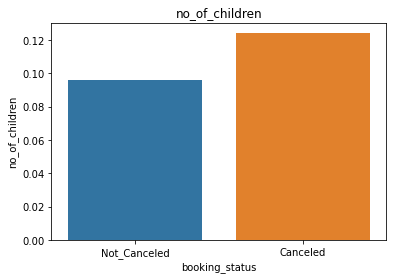

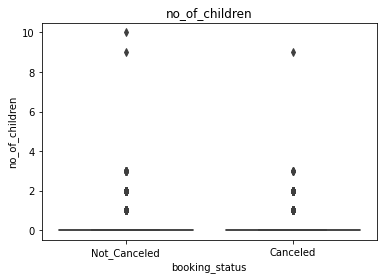

no_of_children  p-value  2.947637376831079e-10  Good Predictor. Avg of this feature is not same for both the groups
-----------------------------------------------------------------------------------------------------
no_of_weekend_nights:
                  count      mean       std  min  25%  50%  75%  max
booking_status                                                      
Canceled        11885.0  0.887505  0.919267  0.0  0.0  1.0  2.0  7.0
Not_Canceled    24390.0  0.773309  0.843428  0.0  0.0  1.0  1.0  6.0


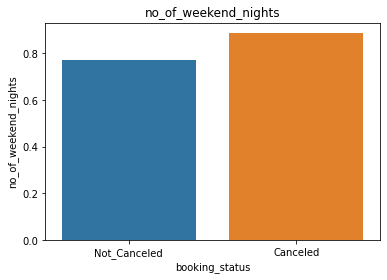

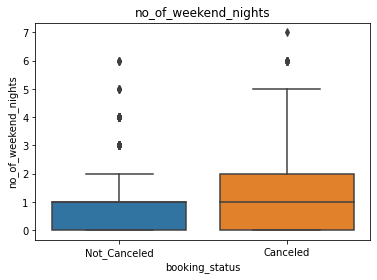

no_of_weekend_nights  p-value  8.340701585971926e-32  Good Predictor. Avg of this feature is not same for both the groups
-----------------------------------------------------------------------------------------------------
no_of_week_nights:
                  count      mean       std  min  25%  50%  75%   max
booking_status                                                       
Canceled        11885.0  2.392259  1.583088  0.0  1.0  2.0  3.0  17.0
Not_Canceled    24390.0  2.112710  1.309173  0.0  1.0  2.0  3.0  17.0


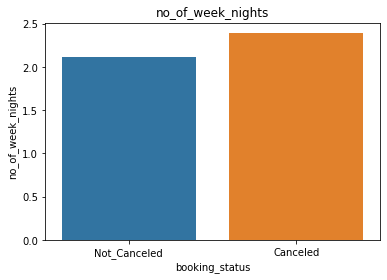

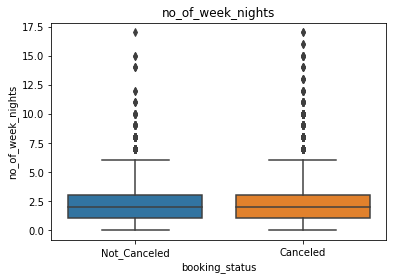

no_of_week_nights  p-value  1.7272158751415455e-70  Good Predictor. Avg of this feature is not same for both the groups
-----------------------------------------------------------------------------------------------------
lead_time:
                  count        mean        std  min   25%    50%    75%    max
booking_status                                                                
Canceled        11885.0  139.215482  98.947731  0.0  55.0  122.0  205.0  443.0
Not_Canceled    24390.0   58.927224  64.028714  0.0  10.0   39.0   86.0  386.0


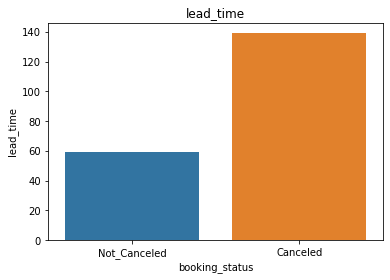

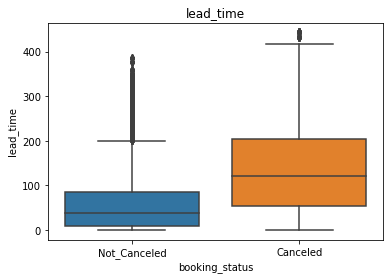

lead_time  p-value  0.0  Good Predictor. Avg of this feature is not same for both the groups
-----------------------------------------------------------------------------------------------------
arrival_month:
                  count      mean       std  min  25%  50%   75%   max
booking_status                                                        
Canceled        11885.0  7.374253  2.655423  1.0  5.0  8.0  10.0  12.0
Not_Canceled    24390.0  7.447724  3.252560  1.0  5.0  8.0  10.0  12.0


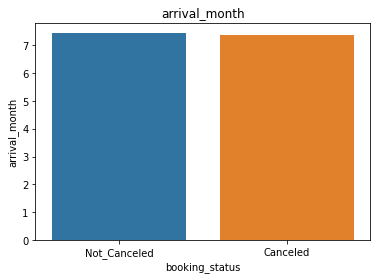

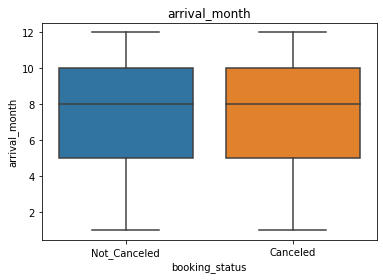

arrival_month  p-value  0.03239997582757596  Good Predictor. Avg of this feature is not same for both the groups
-----------------------------------------------------------------------------------------------------
arrival_date:
                  count       mean       std  min  25%   50%   75%   max
booking_status                                                          
Canceled        11885.0  15.730080  8.783946  1.0  8.0  16.0  23.0  31.0
Not_Canceled    24390.0  15.532144  8.718617  1.0  8.0  15.0  23.0  31.0


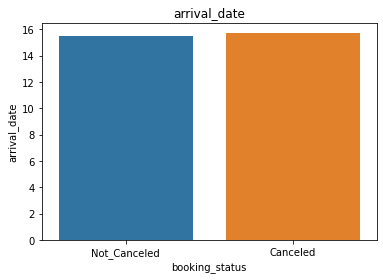

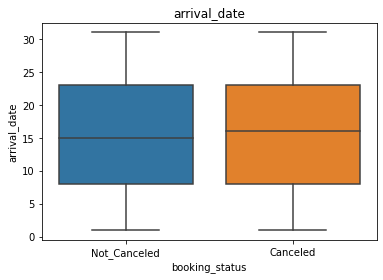

arrival_date  p-value  0.04292948340681466  Good Predictor. Avg of this feature is not same for both the groups
-----------------------------------------------------------------------------------------------------
no_of_previous_cancellations:
                  count      mean       std  min  25%  50%  75%   max
booking_status                                                       
Canceled        11885.0  0.005553  0.241941  0.0  0.0  0.0  0.0  13.0
Not_Canceled    24390.0  0.032021  0.415967  0.0  0.0  0.0  0.0  11.0


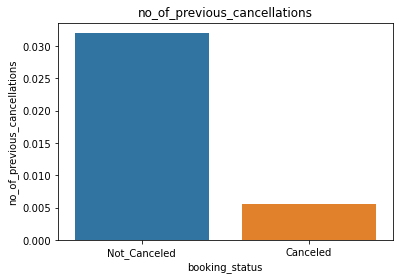

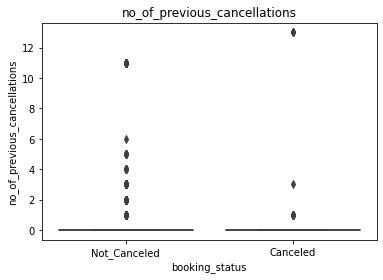

no_of_previous_cancellations  p-value  1.3152065000503417e-10  Good Predictor. Avg of this feature is not same for both the groups
-----------------------------------------------------------------------------------------------------
no_of_previous_bookings_not_canceled:
                  count      mean       std  min  25%  50%  75%   max
booking_status                                                       
Canceled        11885.0  0.002188  0.129710  0.0  0.0  0.0  0.0  12.0
Not_Canceled    24390.0  0.227101  2.133507  0.0  0.0  0.0  0.0  58.0


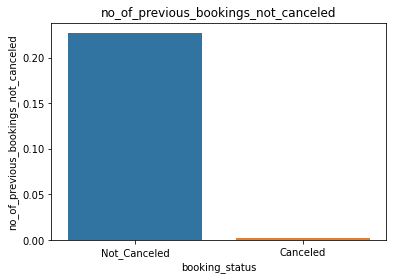

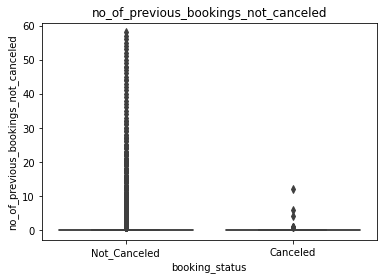

no_of_previous_bookings_not_canceled  p-value  1.8287364128686035e-30  Good Predictor. Avg of this feature is not same for both the groups
-----------------------------------------------------------------------------------------------------
avg_price_per_room:
                  count        mean        std  min    25%    50%     75%  \
booking_status                                                              
Canceled        11885.0  110.589966  32.264394  0.0  89.27  108.0  126.36   
Not_Canceled    24390.0   99.931412  35.872154  0.0  77.86   95.0  119.10   

                  max  
booking_status         
Canceled        540.0  
Not_Canceled    375.5  


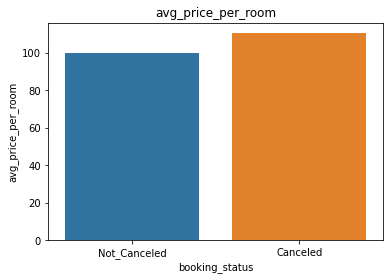

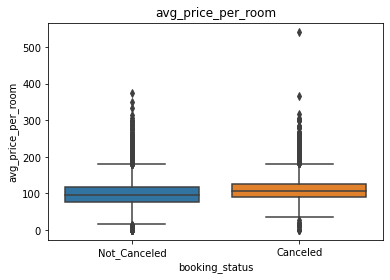

avg_price_per_room  p-value  5.2303189247998436e-164  Good Predictor. Avg of this feature is not same for both the groups
-----------------------------------------------------------------------------------------------------
no_of_special_requests:
                  count      mean       std  min  25%  50%  75%  max
booking_status                                                      
Canceled        11885.0  0.334623  0.574345  0.0  0.0  0.0  1.0  2.0
Not_Canceled    24390.0  0.758549  0.836532  0.0  0.0  1.0  1.0  5.0


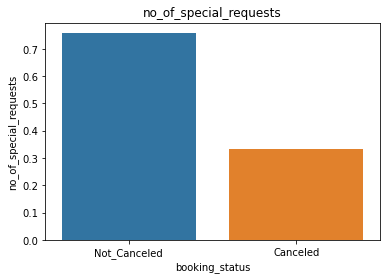

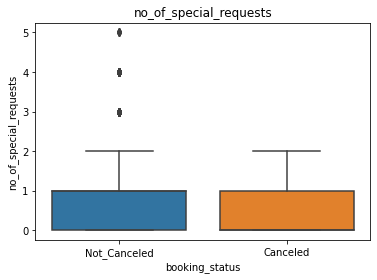

no_of_special_requests  p-value  0.0  Good Predictor. Avg of this feature is not same for both the groups
-----------------------------------------------------------------------------------------------------


In [50]:
for column in continuous:
    print(column + ':')
    print(df[column].groupby(df.booking_status).describe())
    plt.figure()
    sns.barplot(y=df[column], x=df.booking_status, ci=False)
    plt.title(column)
    plt.show()
    plt.figure()
    sns.boxplot(y =df[column], x=df['booking_status'])
    plt.title(column)
    plt.show()
    model = ols('df[column]~booking_status', data=df).fit()
    aov_table = sm.stats.anova_lm(model)
    #print(aov_table)
    p = aov_table['PR(>F)'][0]
    if p>0.05:
        print(column,"","p-value","",p," Bad Predictor. Avg of this feature is same for both the groups")
        print('-----------------------------------------------------------------------------------------------------')
    else:
        print(column,"","p-value","",p," Good Predictor. Avg of this feature is not same for both the groups")
        print('-----------------------------------------------------------------------------------------------------')

In [51]:
# cancellation of booking doesn't show much difference wrt no.adults
# same pattern is follwed wrt to no.of children, but we see a slight tendency that more no. of children leads to more cancellation
# we see a slight tendency that more no. of weekend nights leads to more cancellation
# we see same pattern with more no. of week nights.
# This means longer booking are more prone to get cancelled
# Cancellation percentage is higher for people whose lead time is higher. This means people who are taking more time to book
# have more chances to cancel
# month and date of arrival is not affecting the cancellation percentage
# People with higher number of previous cancelation have lesser chance of cancelation
# People with high number of non-cancellation have very high percentage of non cancelation
# Overall we can say chance of not cancelling booking is high
# We don't see much difference in avg_price for cancelled and not cancelled group
# People who make more special tend not to cancel booking

In [52]:
df['booking_status'].replace(['Not_Canceled', 'Canceled'],[0,1], inplace=True)

In [53]:
df.booking_status.value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [54]:
df.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [55]:
df.required_car_parking_space.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

In [56]:
df.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [57]:
df.arrival_year.value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

In [58]:
df.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [59]:
df.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [60]:
categorical = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'market_segment_type', 'repeated_guest']

In [61]:
df.type_of_meal_plan.replace(['Not Selected', 'Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3'], [0,1,2,3], inplace=True)

In [62]:
df.room_type_reserved.replace(['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5', 'Room_Type 6', 'Room_Type 7'], [1,2,3,4,5,6,7], inplace=True)

In [63]:
df.arrival_year.replace([2017,2018], [1,2], inplace=True)

In [64]:
df.market_segment_type.replace(['Online', 'Offline', 'Corporate', 'Complementary', 'Aviation'],[1,2,3,4,5], inplace=True)

In [65]:
# for column in categorical:
#     plt.figure(figsize=(20,7))
#     sns.countplot(x = df.booking_status, hue= df[column])
#     plt.legend(loc='best')
#     plt.show()
#     crstab = pd.crosstab(df['booking_status'],df[column])
#     (stats, p, df,_) = chi2_contingency([crstab.iloc[0].values, crstab.iloc[1].values], correction=False)
#     if p>0.05:
#         print(column,"","p-value","",p," Bad Predictor. There is no significant relationship between the variables")
#     else:
#         print(column,"","p-value","",p," Good Predictor. There is significant relationship between the variables")

<AxesSubplot:xlabel='booking_status', ylabel='count'>

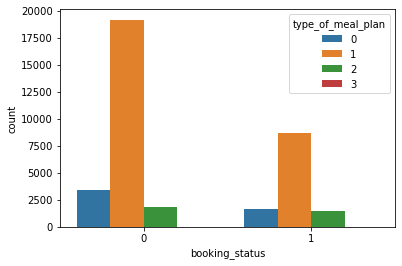

In [66]:
sns.countplot(x = df.booking_status, hue= df['type_of_meal_plan'])

In [67]:
# Meal Type 1 is preferred by most of the guests followed by no meal, similar pattern is seen for both groups

In [68]:
crstab_meal = pd.crosstab(df['booking_status'],df['type_of_meal_plan'])

In [69]:
crstab_meal

type_of_meal_plan,0,1,2,3
booking_status,,,,
0,3431,19156,1799,4
1,1699,8679,1506,1


In [70]:
# Cancellation rate of guest who select meal type 2 is very high

In [71]:
array_meal = np.array(crstab_meal)

In [72]:
chi2_contingency(array_meal, correction=False)

(278.29490920586017,
 4.951915406087789e-60,
 3,
 array([[3.44922674e+03, 1.87152488e+04, 2.22216265e+03, 3.36181943e+00],
        [1.68077326e+03, 9.11975121e+03, 1.08283735e+03, 1.63818057e+00]]))

In [73]:
# Second value is p-value
# if p>0.05:
#     print(column,"","p-value","",p," Bad Predictor. There is no significant relationship between the variables")
# else:
#     print(column,"","p-value","",p," Good Predictor. There is significant relationship between the variables")

In [74]:
# Good Predictor. There is significant relationship between the variables"

<AxesSubplot:xlabel='booking_status', ylabel='count'>

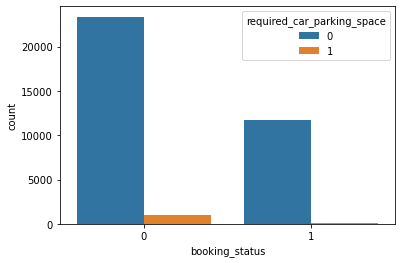

In [75]:
sns.countplot(x = df.booking_status, hue= df['required_car_parking_space'])

In [76]:
# We can availability of parking is not a mojor factor for cancelling the booking

In [77]:
crstab_parking = pd.crosstab(df['booking_status'],df['required_car_parking_space'])

In [78]:
crstab_parking

required_car_parking_space,0,1
booking_status,,
0,23380,1010
1,11771,114


In [79]:
# People requireing car parking are cancelling less, though the number of people looking for this feature is very less

In [80]:
array_parking = np.array(crstab_parking)

In [81]:
chi2_contingency(array_parking, correction=False)

(269.44714368539746,
 1.4976223934666923e-60,
 1,
 array([[23634.26299104,   755.73700896],
        [11516.73700896,   368.26299104]]))

In [82]:
# Second value is p-value
# if p>0.05:
#     print(column,"","p-value","",p," Bad Predictor. There is no significant relationship between the variables")
# else:
#     print(column,"","p-value","",p," Good Predictor. There is significant relationship between the variables")

In [83]:
# Good Predictor. There is significant relationship between the variables"

<AxesSubplot:xlabel='booking_status', ylabel='count'>

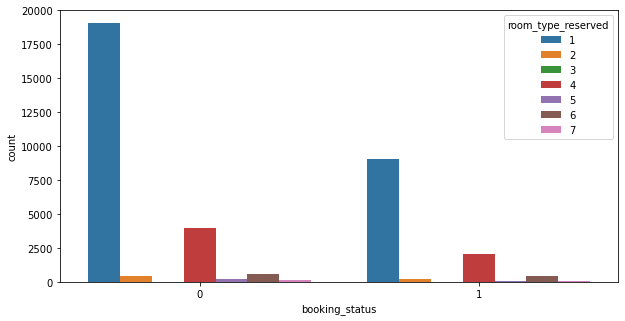

In [84]:
plt.figure(figsize = (10,5))
sns.countplot(x = df.booking_status, hue= df['room_type_reserved'])

In [85]:
# Similar pattern is followed by both the groups

In [86]:
crstab_room = pd.crosstab(df['booking_status'],df['room_type_reserved'])

In [87]:
crstab_room

room_type_reserved,1,2,3,4,5,6,7
booking_status,,,,,,,
0,19058,464,5,3988,193,560,122
1,9072,228,2,2069,72,406,36


In [88]:
# Room type four and six cancellation rate is very high

In [89]:
array_room = np.array(crstab_parking)

In [90]:
chi2_contingency(array_room, correction=False)

(269.44714368539746,
 1.4976223934666923e-60,
 1,
 array([[23634.26299104,   755.73700896],
        [11516.73700896,   368.26299104]]))

In [91]:
# Second value is p-value
# if p>0.05:
#     print(column,"","p-value","",p," Bad Predictor. There is no significant relationship between the variables")
# else:
#     print(column,"","p-value","",p," Good Predictor. There is significant relationship between the variables")

In [92]:
# Good Predictor. There is significant relationship between the variables"

<AxesSubplot:xlabel='arrival_year', ylabel='count'>

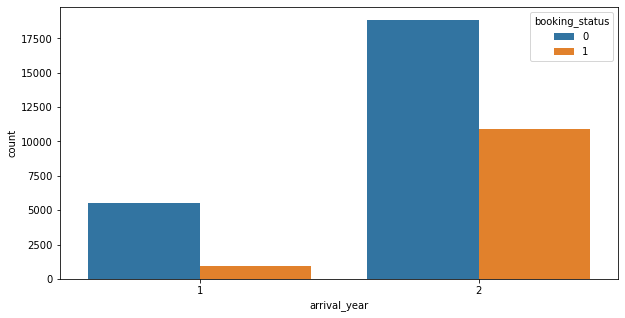

In [93]:
plt.figure(figsize = (10,5))
sns.countplot(hue = df.booking_status, x= df['arrival_year'])

In [94]:
# Contribution to cancellation in 2017 is less compared to 2018, percentage of non cancellation is more significantly more in 2017

In [95]:
crstab_year = pd.crosstab(df['arrival_year'],df['booking_status'])

In [96]:
crstab_year

booking_status,0,1
arrival_year,,
1,5553,961
2,18837,10924


In [97]:
# Cancellation in 2017 is just 961

In [98]:
array_year = np.array(crstab_year)

In [99]:
chi2_contingency(array_year, correction=False)

(1169.1658803091104,
 3.065393311071663e-256,
 1,
 array([[ 4379.77835975,  2134.22164025],
        [20010.22164025,  9750.77835975]]))

In [100]:
# Second value is p-value
# if p>0.05:
#     print(column,"","p-value","",p," Bad Predictor. There is no significant relationship between the variables")
# else:
#     print(column,"","p-value","",p," Good Predictor. There is significant relationship between the variables")

In [101]:
# Good Predictor. There is significant relationship between the variables"

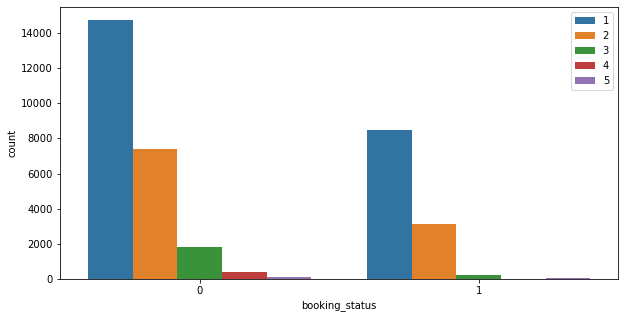

In [102]:
plt.figure(figsize = (10,5))
sns.countplot(x = df.booking_status, hue= df['market_segment_type'])
plt.legend(loc= 'best')

In [103]:
# Similar pattern is seen between both the groups

In [104]:
crstab_market = pd.crosstab(df['booking_status'],df['market_segment_type'])

In [105]:
crstab_market

market_segment_type,1,2,3,4,5
booking_status,,,,,
0,14739,7375,1797,391,88
1,8475,3153,220,0,37


In [106]:
# Cancellation from Complementory is 0, corporation cancellation is also less

In [107]:
array_market = np.array(crstab_market)

In [108]:
chi2_contingency(array_market, correction=False)

(814.108865240557,
 6.748763024557236e-175,
 4,
 array([[15608.25527223,  7078.64700207,  1356.15796003,   262.89427981,
            84.04548587],
        [ 7605.74472777,  3449.35299793,   660.84203997,   128.10572019,
            40.95451413]]))

In [109]:
# Second value is p-value
# if p>0.05:
#     print(column,"","p-value","",p," Bad Predictor. There is no significant relationship between the variables")
# else:
#     print(column,"","p-value","",p," Good Predictor. There is significant relationship between the variables")

In [110]:
# Good Predictor. There is significant relationship between the variables"

<AxesSubplot:xlabel='repeated_guest', ylabel='count'>

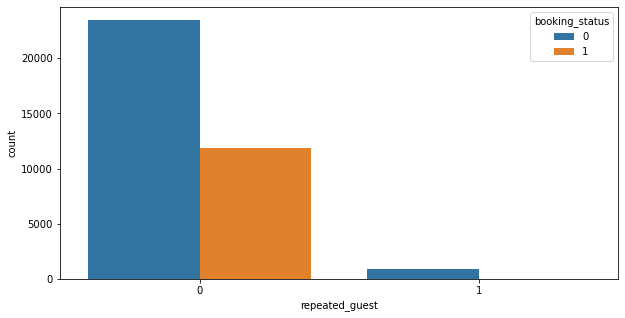

In [111]:
plt.figure(figsize = (10,5))
sns.countplot(hue = df.booking_status, x= df['repeated_guest'])

In [112]:
crstab_repeat = pd.crosstab(df['repeated_guest'], df['booking_status'])

In [113]:
crstab_repeat

booking_status,0,1
repeated_guest,,
0,23476,11869
1,914,16


In [114]:
# Count of reapeat customer cancelling is very less

In [115]:
array_repeat = np.array(crstab_repeat)

In [116]:
chi2_contingency(array_repeat, correction=False)

(417.54056942785394,
 8.370937808836797e-93,
 1,
 array([[23764.70158511, 11580.29841489],
        [  625.29841489,   304.70158511]]))

In [117]:
# Second value is p-value
# if p>0.05:
#     print(column,"","p-value","",p," Bad Predictor. There is no significant relationship between the variables")
# else:
#     print(column,"","p-value","",p," Good Predictor. There is significant relationship between the variables")

In [118]:
# Good Predictor. There is significant relationship between the variables"

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = df[['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','lead_time','arrival_month','arrival_date','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room', 'no_of_special_requests']]

vif_data = pd.DataFrame()

vif_data['features'] = x.columns

vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif_data

,features,VIF
0,no_of_adults,12.649706
1,no_of_children,1.234657
2,no_of_weekend_nights,1.940889
3,no_of_week_nights,3.522081
4,lead_time,2.140591
5,arrival_month,5.883727
6,arrival_date,3.733646
7,no_of_previous_cancellations,1.287965
8,no_of_previous_bookings_not_canceled,1.304029
9,avg_price_per_room,10.760093


In [120]:
# removing no.of.adults

In [121]:
del df['no_of_adults']

In [122]:
df.booking_status.value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

In [123]:
df.type_of_meal_plan.value_counts()

1    27835
0     5130
2     3305
3        5
Name: type_of_meal_plan, dtype: int64

In [124]:
df.required_car_parking_space.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

In [125]:
df.room_type_reserved.value_counts()

1    28130
4     6057
6      966
2      692
5      265
7      158
3        7
Name: room_type_reserved, dtype: int64

In [126]:
df.arrival_year.value_counts()

2    29761
1     6514
Name: arrival_year, dtype: int64

In [127]:
df.market_segment_type.value_counts()

1    23214
2    10528
3     2017
4      391
5      125
Name: market_segment_type, dtype: int64

In [128]:
df.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [129]:
df_rf = df.copy()

In [130]:
categorical = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'market_segment_type', 'repeated_guest']

In [131]:
df_dummies_meal = pd.get_dummies(df['type_of_meal_plan'], drop_first=True, prefix = 'meal_plan')

In [132]:
df = pd.concat([df,df_dummies_meal], axis=1)

In [133]:
del df['type_of_meal_plan']

In [134]:
df_dummies_parking = pd.get_dummies(df['required_car_parking_space'], drop_first=True, prefix = 'parking')

In [135]:
df = pd.concat([df,df_dummies_parking], axis=1)

In [136]:
del df['required_car_parking_space']

In [137]:
df_dummies_room = pd.get_dummies(df['room_type_reserved'], drop_first=True, prefix = 'room_type')

In [138]:
df = pd.concat([df,df_dummies_room], axis=1)

In [139]:
del df['room_type_reserved']

In [140]:
df_dummies_year = pd.get_dummies(df['arrival_year'], drop_first=True, prefix = 'year')

In [141]:
df = pd.concat([df,df_dummies_year], axis=1)

In [142]:
del df['arrival_year']

In [143]:
df_dummies_market = pd.get_dummies(df['market_segment_type'], drop_first=True, prefix = 'market_segment')

In [144]:
df = pd.concat([df,df_dummies_market], axis=1)

In [145]:
del df['market_segment_type']

In [146]:
df_dummies_repeat = pd.get_dummies(df['repeated_guest'], drop_first=True, prefix = 'repeat_guest')

In [147]:
df = pd.concat([df,df_dummies_repeat], axis=1)

In [148]:
del df['repeated_guest']

In [149]:
df.head()

,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,meal_plan_1,meal_plan_2,meal_plan_3,parking_1,room_type_2,room_type_3,room_type_4,room_type_5,room_type_6,room_type_7,year_2,market_segment_2,market_segment_3,market_segment_4,market_segment_5,repeat_guest_1
0,0,1,2,224,10,2,0,0,65.00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,2,3,5,11,6,0,0,106.68,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2,1,1,2,28,0,0,60.00,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,2,211,5,20,0,0,100.00,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,1,48,4,11,0,0,94.50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [150]:
x = df.iloc[:, df.columns != 'booking_status']

In [151]:
y = df.iloc[:, df.columns == 'booking_status']

In [152]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)

In [153]:
from sklearn.model_selection import cross_val_score 

In [154]:
cross_val_score(lr, x, y.squeeze(), cv=skfold).mean()

NameError: name 'lr' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)

In [ ]:
len(x_train)

In [ ]:
len(y_train)

In [ ]:
len(x_test)

In [ ]:
len(y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123, solver='liblinear')

In [ ]:
model1 = lr.fit(x_train,y_train.squeeze())

In [ ]:
y_pred_tr1 = model1.predict(x_train)

In [ ]:
y_pred_te1 = model1.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_te1))

In [ ]:
y_pred_te1_proba = model1.predict_proba(x_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
(fpr, tpr, thresholds) = roc_curve(y_test,y_pred_te1_proba[:,1])

In [ ]:
auc= roc_auc_score(y_test,y_pred_te1_proba[:,1])

In [ ]:
auc

In [ ]:
plt.plot(fpr,tpr, label = 'AUC=' + str(auc))
plt.legend(loc='best')
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)

In [ ]:
x_sm,y_sm =smote.fit_resample(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_sm, y_sm, test_size=0.3, random_state=123, shuffle=True)

In [ ]:
len(X_train)

In [ ]:
len(y_train)

In [ ]:
len(X_test)

In [ ]:
len(y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123, solver='liblinear')

In [ ]:
model2 = lr.fit(X_train,y_train.squeeze())

In [ ]:
y_pred_tr1 = model2.predict(X_train)

In [ ]:
y_pred_te1 = model2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_te1))

In [ ]:
y_pred_te1_proba = model2.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
(fpr, tpr, thresholds) = roc_curve(y_test,y_pred_te1_proba[:,1])

In [ ]:
auc= roc_auc_score(y_test,y_pred_te1_proba[:,1])

In [ ]:
auc

In [ ]:
plt.plot(fpr,tpr, label = 'AUC=' + str(auc))
plt.legend(loc='best')
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

In [ ]:
# Find the optimal threshold based on the ROC curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

In [ ]:
y_pred_te1_proba

In [ ]:
y_pred = np.where(y_pred_te1_proba>=0.576,1,0)

In [ ]:
y_pred

In [ ]:
y_pred_te1

In [ ]:
y_pred.squeeze()

In [ ]:
y_pred[:,1]

In [ ]:
print(classification_report(y_test,y_pred[:,1]))

In [ ]:
x = df_rf.iloc[:, df_rf.columns != 'booking_status']

In [ ]:
y = df_rf.iloc[:, df_rf.columns == 'booking_status']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=123)

In [ ]:
len(x_train)

In [ ]:
len(y_train)

In [ ]:
len(x_test)

In [ ]:
len(y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(random_state=123)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {'max_depth': [4,6,8,9,10,11,12,13,14], 'min_samples_split': [2,3,4],'max_features':['sqrt', 0.5, 0.25,'log2'], 'n_estimators': [50,100,150]}

In [ ]:
clf = RandomizedSearchCV(rfr, params, n_iter=10, cv=5)

In [ ]:
model3 = clf.fit(x_train,y_train)

In [ ]:
model3.best_params_

In [ ]:
model3.best_score_

In [ ]:
model3.score(x_train,y_train)

In [ ]:
rfr = RandomForestClassifier(n_estimators=150,n_jobs=-1, min_samples_split=2, max_features='sqrt',max_depth=14, oob_score=True, random_state=123)

In [ ]:
model4 = rfr.fit(x_train,y_train)

In [ ]:
y_pred_te_rf = model4.predict(x_test)

In [ ]:
model4.score(x_test,y_test)

In [ ]:
model4.feature_importances_

In [ ]:
model4.oob_score_

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_te_rf))

In [ ]:
y_pred_te1_proba = model4.predict_proba(x_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
(fpr, tpr, thresholds) = roc_curve(y_test,y_pred_te1_proba[:,1])

In [ ]:
auc= roc_auc_score(y_test,y_pred_te1_proba[:,1])

In [ ]:
auc

In [ ]:
plt.plot(fpr,tpr, label = 'AUC=' + str(auc))
plt.legend(loc='best')
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])

In [ ]:
# Find the optimal threshold based on the ROC curve
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal threshold:", optimal_threshold)

In [ ]:
y_pred_te1_proba

In [ ]:
y_pred = np.where(y_pred_te1_proba>=0.304,1,0)

In [ ]:
y_pred

In [ ]:
y_pred[:,1]

In [ ]:
print(classification_report(y_test,y_pred[:,1]))